<a href="https://colab.research.google.com/github/SoumyaTeotia/Pytorch-Tutorials/blob/main/01_pyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PyTorch workflow


In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.0.1+cu118'

##1. Data (preparing and loading)
Data can be almost anything... in machine learning.
* Excel spreadsheet
* Images of any kind
* Videos
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters** (something that a model learns).

In [ ]:
#Create known parameters
weight = 0.7 #slope or gradient
bias = 0.3 #constant

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) #capital X as it is a tensor
y = weight * X + bias

X[:10], y[:10] #slicing -> first 10 values of X and first 10 values of y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

#Three datasets
1. Course Materials (**training set**) - 70% of data
2. Practice exam (**validation set**) - Tune model patterns, used to improve models buy checking whether they are working on unknown datasets and making the necessary changes in the model, 15% of data
3. Final exam (**test set**) - see if the model is ready for the wild, 15% of data

##Generalization

The ability for a machine learning model to perform well on data it hasn't seen

###Splitting  data into training and test sets (one of the most imp concepts in ML in general)

Let's create a training and test set with our data.

In [ ]:
#Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

In [ ]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  #Plot training data in blue
  plt.scatter(train_data, train_label, c='b', s=4, label="Training data")

  #Plot test data in green
  plt.scatter(test_data, test_label, c='g', s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  #Show the legend
  plt.legend(prop={"size":14});

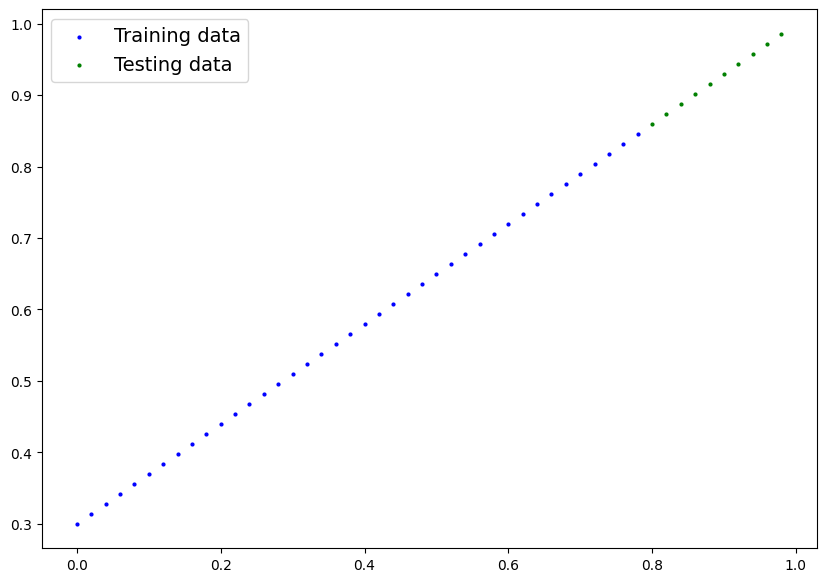

In [ ]:
plot_predictions();

##2. Build model
Our first PyTorch model

What our model does:
* Start with the random values (weight & bias)
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

 What requires_grad=True is going to do is that when we are going to run the computations using this model, pytorch is going to keep track of the gradients of our weight parameter and our bias parameter and then it's going to update them through a combination of gradient descent and backpropogation.

 We'll be focusing on pytorch code to trigger these algorithms behind the scenes.

**Forward method** is the operation that this method does.

In [ ]:
# @title
 #Create a linear regression model class
from torch import nn

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
     def __init__(self):
       super().__init__()
       self.weight = nn.Parameter(torch.randn(1,                  #start with a random value
                                             requires_grad=True,  #gradient descent is why we have requires_grad=True i.e. it can update via gradient descent
                                             dtype=torch.float))  #Pytorch is going to track the gradient of this parameter for us
       self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))   #PyTorch loves the datatype torch.float32

    #Forward method to define the computation in the model
     def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data of type tensor and gives an output in the form of tensor
        return self.weight * x + self.bias  #this is the linear regression formula


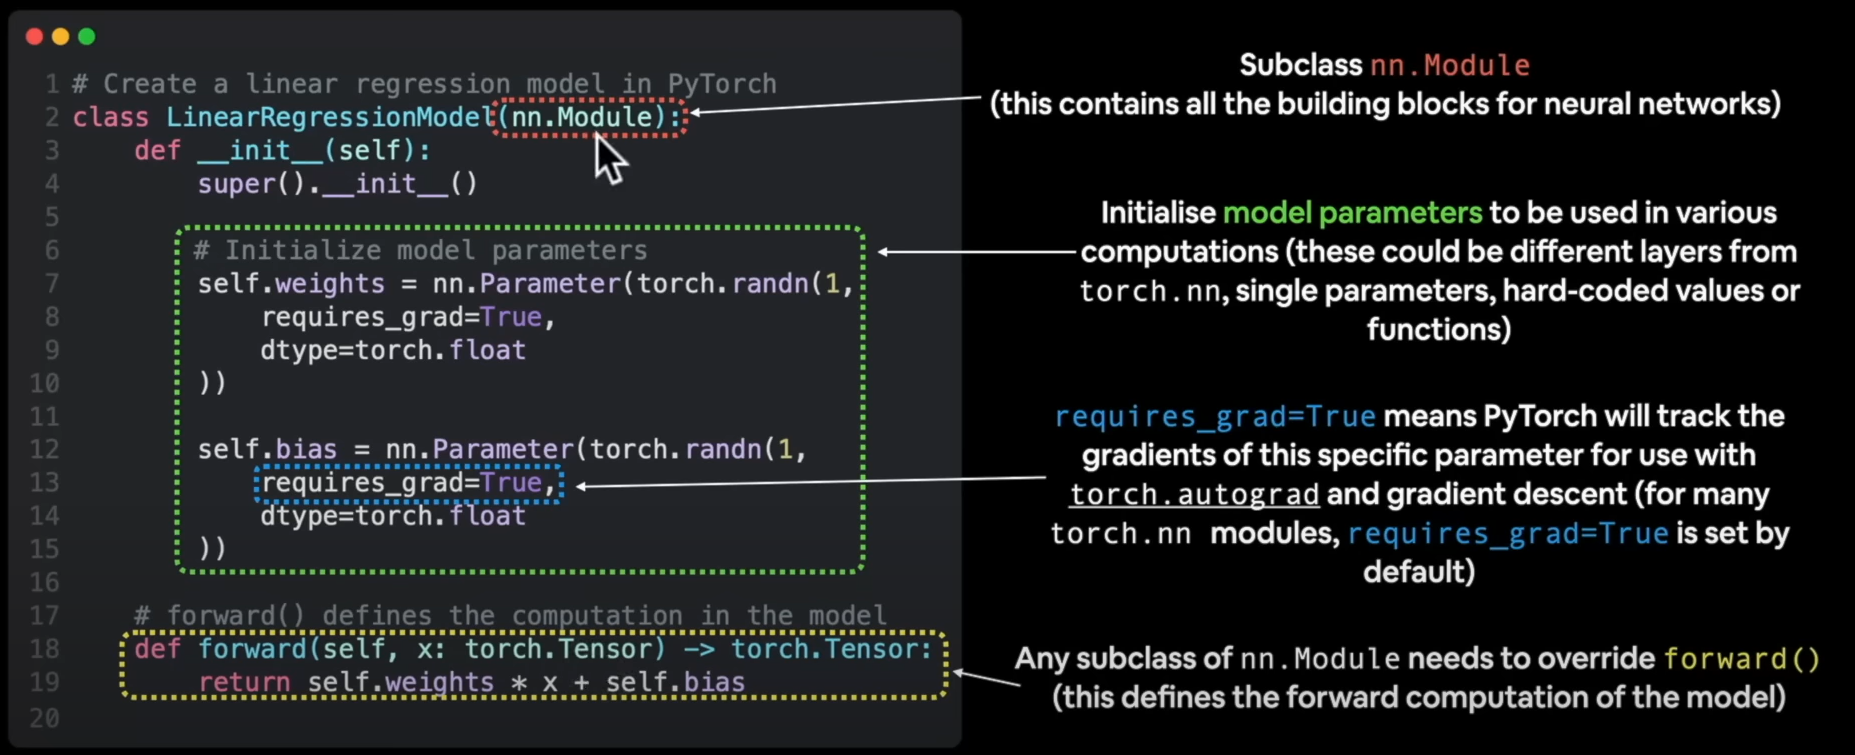

###PyTorch model building essentials
* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent.
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

Optimizers contain algorithm that is going to optimize these values instead of being random to being values that better represent our data.

First two are for creating the model, third one is for optimizing the parameters, and the last two are for collecting the dataset.

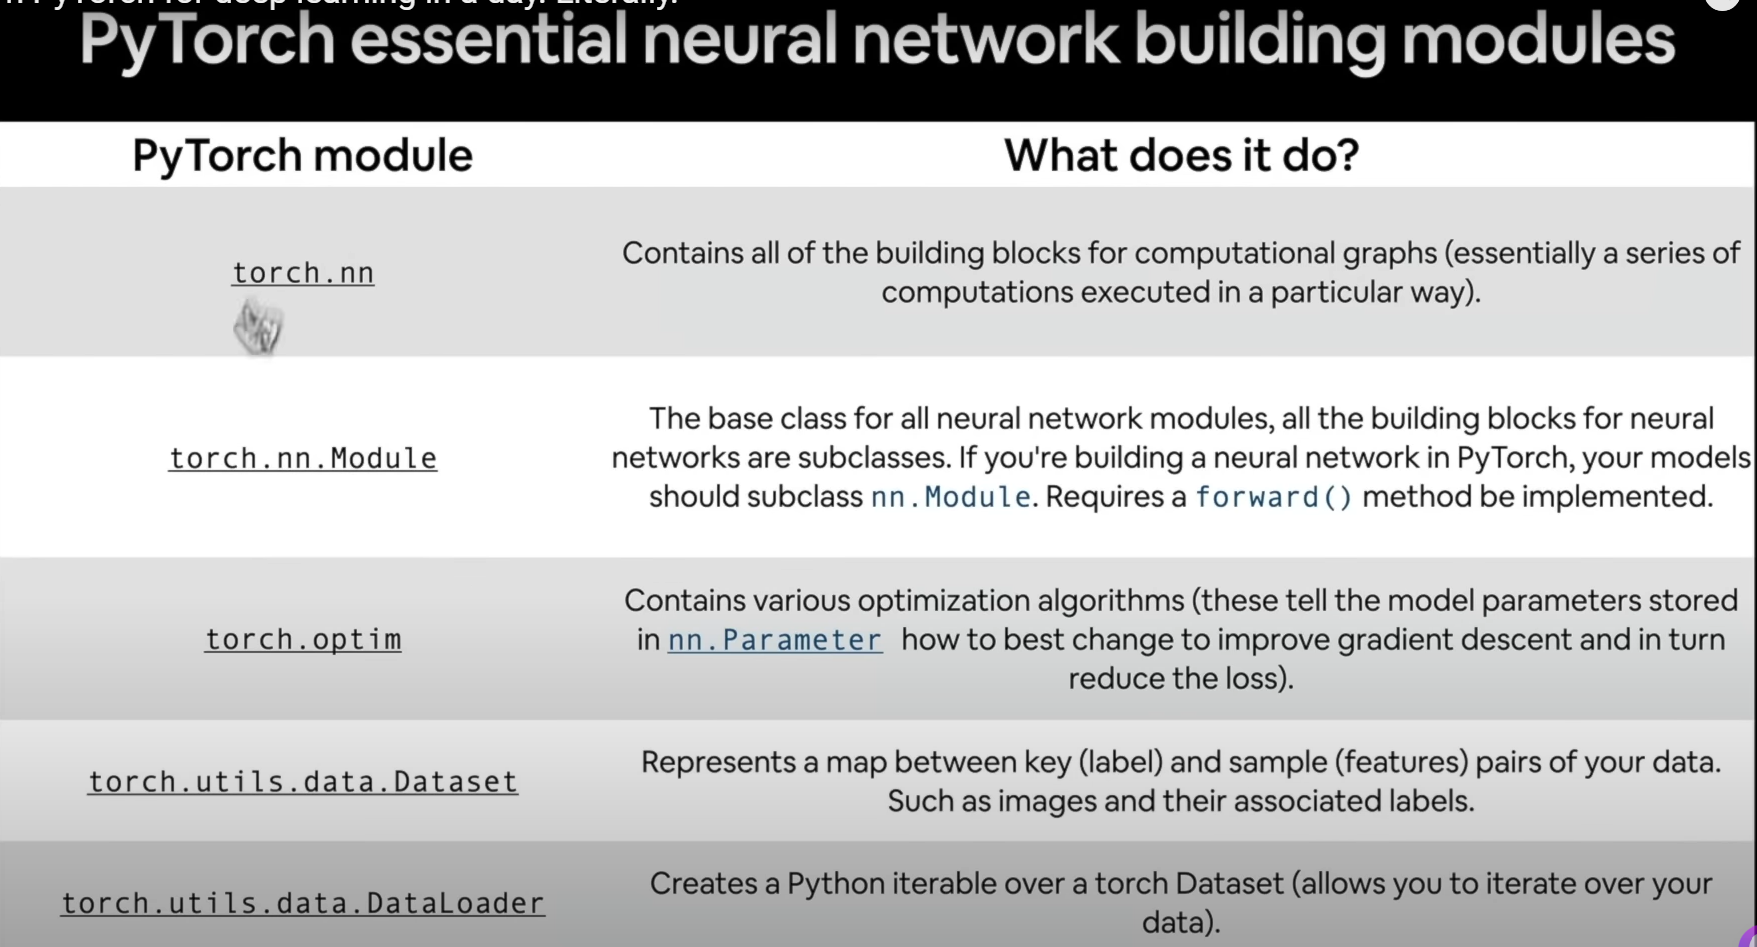

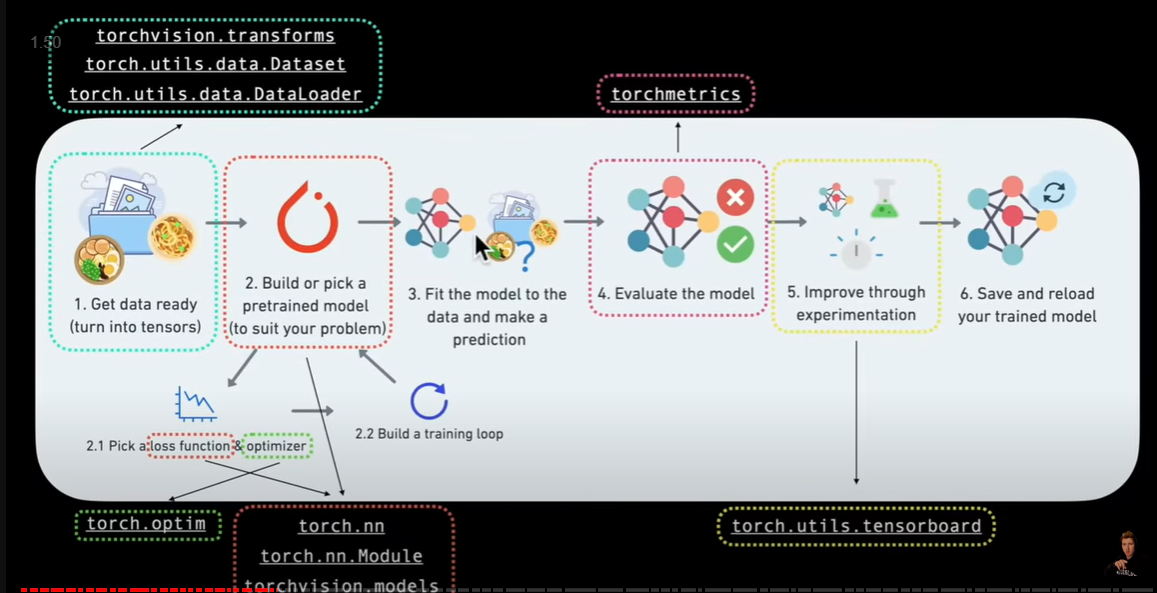

###Checking the contents of our PyTorch model
Now we've created a model, let's see what's inside

So we can check our model parameters or what's inside our model using `.parameters()`.

In [ ]:
#Create a random seed (so that we don't get a different value everytime ~ for educational means)
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters()) #we got random value, because we created parameters using randn, but same random value bcz we used manual seed



[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

###Making predictions using `torch.inference_mode()`

To check our Model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method


`inference_mode()` turns off gradient tracking, because we don't need to do training on the predicted data. But ` y_preds=model_0(X_test)` does keep a track which means it's keeping track of a large data, hence our predictions will be a lot slower.

{PyTorch inference_mode twitter}

`torch.no_grad()` could also be used but `inference_mode()` is newer and hence preferred.

In [ ]:
#Make predictions with model
with torch.inference_mode():  #we could've used y_preds=model_0(X_test)
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

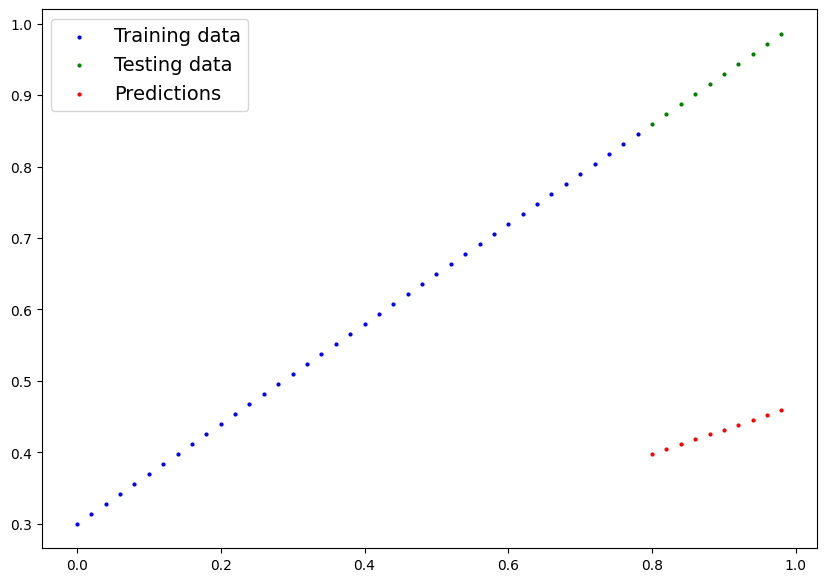

In [ ]:
plot_predictions(predictions = y_preds)

Ideal model will have red dots on green dots. Since our model is initialised with random parameters, hence it's making random predictions, so they are extremely far from where our ideal predictions are. So we want to write some code that will move these red dots closer to the green dots


##3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

*Note: Loss functions may also be called cost function or criterion in different areas

Things we need to train:
* **Loss function:** A function to measure how worng your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve the loss function.

And especially for PyTorch, we need:
* A training loop
* A testing loop

There are many loss functions in PyTorch, some of them are:
* nn.L1Loss - We'll be using this one, it is used to measure mean absolute error (MAE), used for regression problems.
* nn.MSELoss - Used for measuring mean squared error. Used in regression problems.
* nn.CrossEntropyLoss - Used with classification problems.

MAE_loss = torch.mean(torch.abs(y_pred-y_test))

          or

MAE_loss = torch.nnL1Loss

In optimizer, SGD is a popular model, which means Stochastic Gradient Descent, which means random gradient descent, it starts by randomly adjusting values. It checks if making this change, decreases the loss function then it keeps on making that change, until it doesn't affect it anymore.

parameter -> model sets itself

hyperparameter -> we ML engineers set it

In [ ]:
#Setup a loss function
loss_fn = nn.L1Loss()

#Setup a optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) #lr = learning rate ->these changes it's going to make on the paramter value

Forward pass or Forward propagation is data moving from the input layer to the output layer.



##Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameter of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

Gradient is slope. If we are on the left side of the hill, then we have some gradient value, if we want to reduce the loss value, we will decrease the slope to reach the ground.

In [ ]:
torch.manual_seed(42)
#An epoch is one loop through the data... (this is a hyperparameter)
epochs = 200

#Track different values - we track the values so that we can compare future experiments to past experiments
epoch_count = []
loss_values = []
test_loss_values = []

###Training
# 0. Loop through the data
for epoch in range(epochs):
  #Set the model to training mode
  model_0.train() #train mode in PyTorch sets all parameters that require gradients to require gradients (set to true)

  #1. Forward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train) #first predictions than labels
  print(f"Loss: {loss}")

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()
  #optimizer makes some calculations in how it should adjust model parameters with regards to back propagation of the loss
  #by default how the optimizer changes will accumulate through the loop so, we have to zero them above in step 3 for the next iteration of the loop
  #we calculate the gradients because we want to head in the opposite direction of the gradient to get to a gradient value of zero. If we get to the gradient value of zero, with the loss function, then the loss value is also zero
  #5. Step the optimizer (perform gradient descent)
  optimizer.step( )

  ###Testing
  model_0.eval() #turns off different settings in the model not needed for evaluation/testing (dropout/batch norm)
  with torch.inference_mode(): #turns off gradient tracking & a couple more things behind the scenes
  #with torch.no_grad(): this can also be used but inference_mode is a faster way to do things, you may see it in older PyTorch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  #Print out what's happenin'
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss }")
    #Print out model state_dict()
    print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0.07

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

* **Backpropagation** is just a way of propagating the total loss back into the neural network to know how much of the loss every node is responsible for, and subsequently updating the weights in a way that minimizes the loss by giving the nodes with higher error rates lower weights, and vice versa.

* In mathematical terminology, Optimization algorithm refers to the task of minimizing/maximizing an objective function f(x) parameterized by x. Similarly, in machine learning, optimization is the task of minimizing the cost function parameterized by the model's parameters. The main objective of **gradient descent** is to minimize the convex function using iteration of parameter updates.

* To put it plainly, gradient descent is the process of using gradients to find the minimum value of the cost function, while backpropagation is calculating those gradients by moving in a backward direction in the neural network. Judging from this, it would be safe to say that gradient descent relies on backpropagation.

* PyTorch is going to create a curve for each parameter behind the scene using autograd, and then optimize it.

* Backpropagation is creating these derivative curves or gradient curves for each of the parameter

* learning rates - start with large steps, and decrease step size as you reach the bottom (convergence), to avoid passing through the bottom

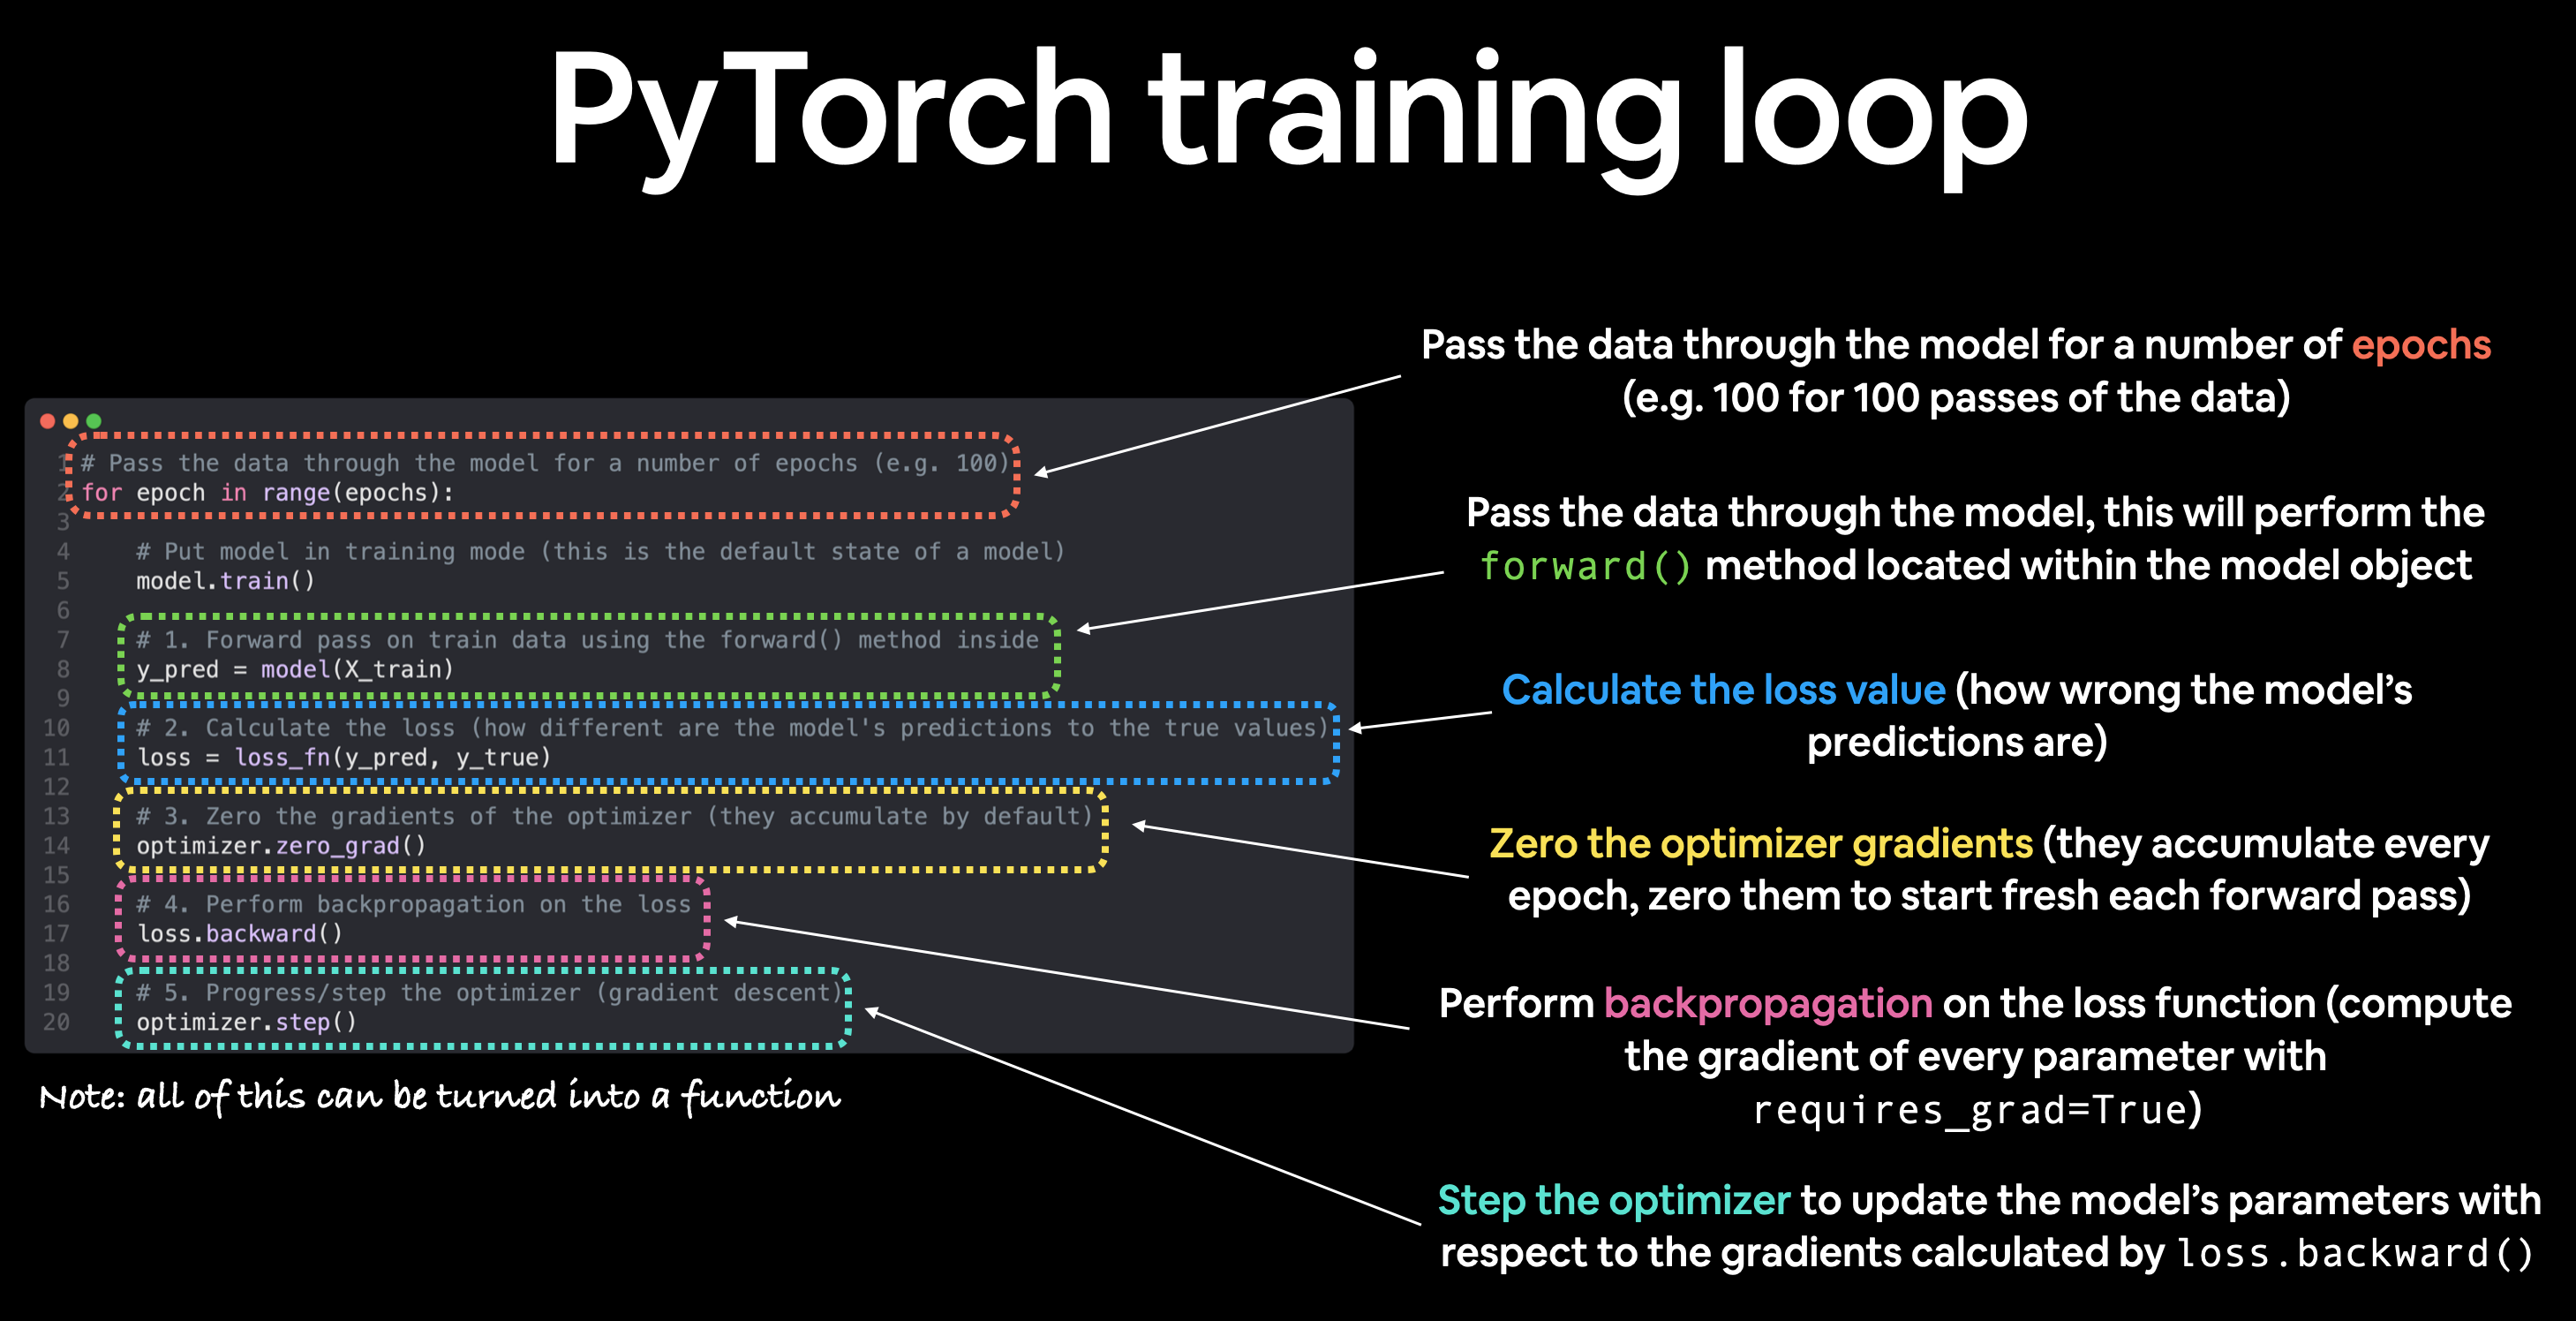

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

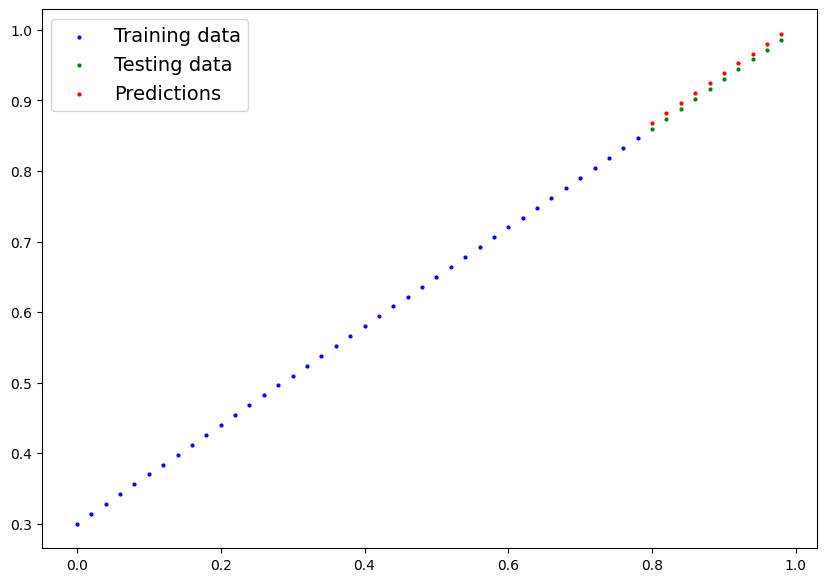

In [ ]:
plot_predictions(predictions=y_preds_new)

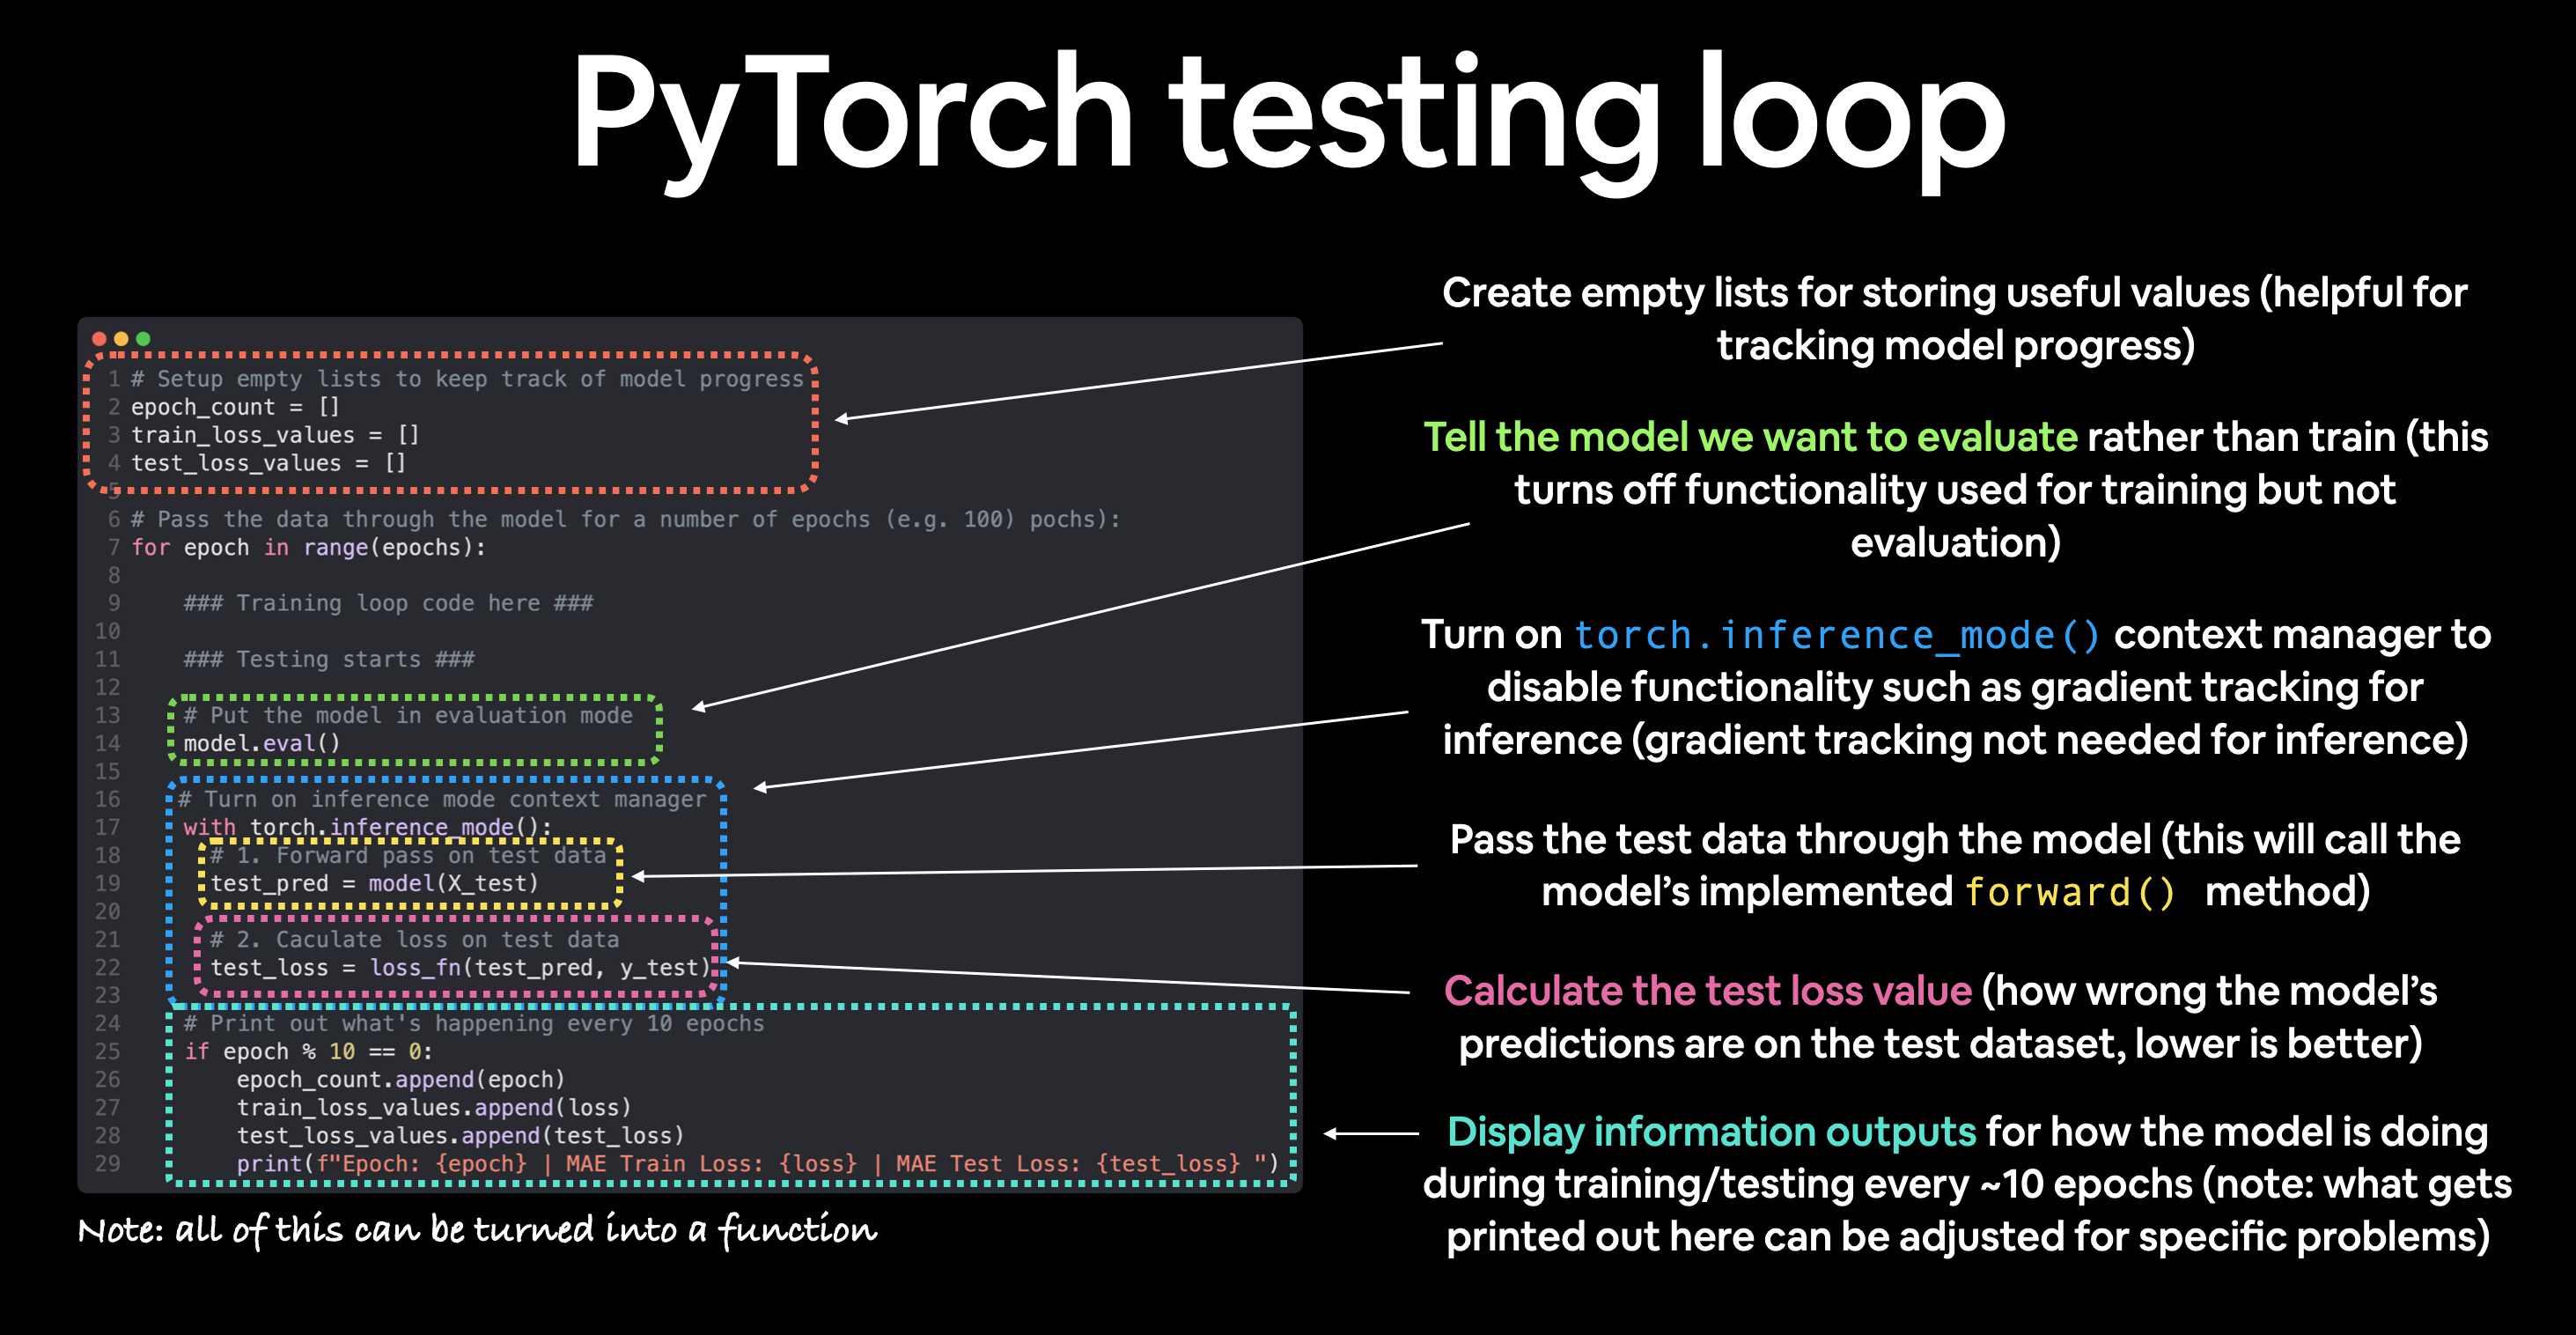

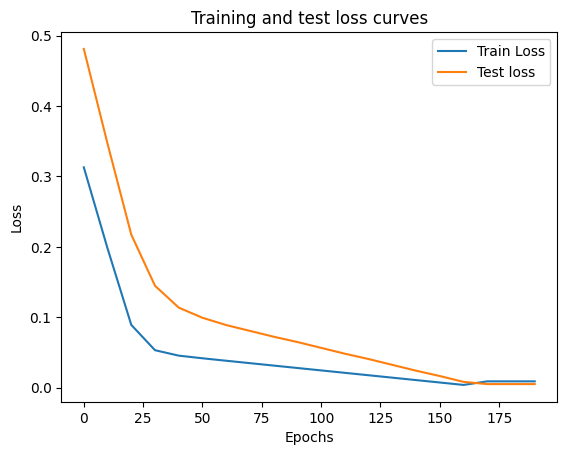

In [ ]:
#Plot the loss curves
import numpy as np
#Our loss_values are still in PyTorch, but matplotlib works on numpy, so we are converting our loss values of the training loss to numpy from tensor
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

Both the loss curves converge, if there was a distance between them then there would have been a problem

##Saving a model in PyTorch

There are three main methods you should know about, for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format

2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.module.load_state_dict()` - this allows to load a model's saved state dictionary {a dictionary that holds the state of your model}

The recommended way of saving and loading a PyTorch model is by saving its state_dict

If we want to use our model outside of our notebook, say in an application or another notebook then we should know how to save and load it.

In [ ]:
#Saving our PyTorch model
from pathlib import Path #Python's module for dealing with writing file paths
#if we save a file from google colab then the model will disappear if the google colab notebook instance disconnects

#1. Create model's directory ->this helps in creating a folder called models, this can also be done by right clicking there
MODEL_PATH = Path("models") #using the path library here to create us a path called models
MODEL_PATH.mkdir(parents = True, exist_ok = True) #mkdir -> make directory,  exist_ok = True means if it already existed then it won't throw us an error

#2. Create a model save path -> this way we can give our model a name
MODEL_NAME = "01_pytorch_workflow_model_0.pth" #pytorch objects usually have an extension '.pth' or '.pt'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#on refreshing, a file named model is created on left hand side

#3. Save the model state_dict {as recommended}
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f = MODEL_SAVE_PATH) #saved the model to the file



Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models #listing the models

total 4
-rw-r--r-- 1 root root 1207 Jul 29 20:09 01_pytorch_workflow_model_0.pth


###Loading a PyTorch model
torch.load() -> Loads an object saved with torch.save() from a file.

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict` into that.

In [ ]:
#To load in a saved state_dict we have to instantiate a new instance of our model
loaded_model_0 = LinearRegressionModel( ) #New instance's state_dict values are initialised randomly

#Load the saved state_dict of model_0 (this will update the new instance)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH)) #on that instance we are calling the load_state_dict of MODEL_SAVE_PATH

<All keys matched successfully>

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

Now both have same values

In [ ]:
#Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
#Compare loaded model preds with original model preds
test_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##6. Putting it all together
Let's go back through the steps above and see it all in one place.

In [ ]:
#Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt


###Create device-agnostic code
This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [ ]:
#Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu
